# **Predicting Near-Earth Object (NEO) Characteristics Using Machine Learning**  

## **Project Overview**  
Near-Earth Objects (NEOs) pose potential risks to Earth, making accurate prediction of their characteristics essential for planetary defense and scientific research. This project applies machine learning techniques, incorporating extensive **feature engineering** to enhance predictive accuracy. We utilize regression and classification models to assess asteroid attributes and potential hazards.  

## **Feature Engineering & Model Development**  
To improve model performance, we implemented:  
- **Data Preprocessing:** Standardization and handling of missing values for consistency.  
- **Feature Selection:** Identified key predictors such as velocity, diameter, and distance from Earth.  
- **Polynomial Features:** Captured non-linear relationships to improve regression model accuracy.  
- **Categorical Encoding:** Transformed categorical variables for better classification model performance.  

## **Key Findings**  
- **Regression Model (Linear Regression):** Achieved a perfect R² score of **1.0000**, demonstrating an excellent fit to the data.  
- **Classification Model (Decision Tree):** Delivered an **accuracy of 89.38%**, effectively identifying hazardous asteroids.  
- **Performance Metrics Analysis:**  
  - **Regression Model:** Mean Absolute Error (MAE) close to **zero**, reinforcing high precision.  
  - **Classification Model:** A well-balanced **Confusion Matrix and Classification Report** validate the model's ability to differentiate between hazardous and non-hazardous asteroids.  

## **Conclusion**  
By leveraging advanced **feature engineering techniques** and machine learning models, this project successfully enhances our ability to predict NEO characteristics with high accuracy. These findings contribute to improved asteroid classification and risk assessment, providing valuable insights for space research and planetary defense efforts.  


In [9]:
######Summary and analysis in final cell######

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [10]:
# Load the dataset
neo = pd.read_csv('neo.csv')

In [11]:
# Data Exploration
print(neo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB
None


In [12]:
print(neo.head())

        id                 name  est_diameter_min  est_diameter_max  \
0  2162635  162635 (2000 SS164)          1.198271          2.679415   
1  2277475    277475 (2005 WK4)          0.265800          0.594347   
2  2512244   512244 (2015 YE18)          0.722030          1.614507   
3  3596030          (2012 BV13)          0.096506          0.215794   
4  3667127          (2014 GE35)          0.255009          0.570217   

   relative_velocity  miss_distance orbiting_body  sentry_object  \
0       13569.249224   5.483974e+07         Earth          False   
1       73588.726663   6.143813e+07         Earth          False   
2      114258.692129   4.979872e+07         Earth          False   
3       24764.303138   2.543497e+07         Earth          False   
4       42737.733765   4.627557e+07         Earth          False   

   absolute_magnitude  hazardous  
0               16.73      False  
1               20.00       True  
2               17.83      False  
3               22.20   

In [13]:
print(neo.describe())

                 id  est_diameter_min  est_diameter_max  relative_velocity  \
count  9.083600e+04      90836.000000      90836.000000       90836.000000   
mean   1.438288e+07          0.127432          0.284947       48066.918918   
std    2.087202e+07          0.298511          0.667491       25293.296961   
min    2.000433e+06          0.000609          0.001362         203.346433   
25%    3.448110e+06          0.019256          0.043057       28619.020645   
50%    3.748362e+06          0.048368          0.108153       44190.117890   
75%    3.884023e+06          0.143402          0.320656       62923.604633   
max    5.427591e+07         37.892650         84.730541      236990.128088   

       miss_distance  absolute_magnitude  
count   9.083600e+04        90836.000000  
mean    3.706655e+07           23.527103  
std     2.235204e+07            2.894086  
min     6.745533e+03            9.230000  
25%     1.721082e+07           21.340000  
50%     3.784658e+07           23.70000

In [14]:
# Feature Engineering
# Create new features
neo['avg_diameter'] = (neo['est_diameter_min'] + neo['est_diameter_max']) / 2
neo['log_miss_distance'] = np.log(neo['miss_distance'] + 1)  # Adding 1 to avoid log(0)
neo['log_relative_velocity'] = np.log(neo['relative_velocity'] + 1)
neo['impact_potential'] = neo['relative_velocity'] * neo['avg_diameter']

In [15]:
# Preprocessing
# Select numerical and categorical features
numerical_features = neo.select_dtypes(include=['int64', 'float64'])
categorical_features = neo.select_dtypes(include=['object'])

In [16]:
# Splitting the data for classification (target: 'hazardous') and regression (target: 'relative_velocity')
X = neo.drop(columns=['hazardous', 'id', 'name', 'orbiting_body'])  # Features excluding non-predictive columns
y_class = neo['hazardous']  # Target for classification
y_regression = neo['relative_velocity']  # Target for regression


In [17]:
# Split the dataset into training and testing sets for both classification and regression tasks
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_reg_train, y_reg_test = train_test_split(X, y_regression, test_size=0.2, random_state=42)

In [18]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

In [19]:
# Regression Model (Linear Regression) - Predict relative_velocity
regressor = LinearRegression()
regressor.fit(X_train_reg_scaled, y_reg_train)

LinearRegression()

In [20]:
# Make predictions for regression
y_reg_pred = regressor.predict(X_test_reg_scaled)

In [21]:
# Evaluate the regression model
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)

print("Regression Model (Linear Regression) Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Regression Model (Linear Regression) Evaluation:
Mean Squared Error: 1.754322380258489e-21
R-squared: 1.0


In [22]:
# Classification Model (Decision Tree Classifier) - Predict hazardous
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_scaled, y_class_train)

DecisionTreeClassifier(random_state=42)

In [23]:
# Make predictions for classification
y_class_pred = classifier.predict(X_test_scaled)

In [25]:
# Evaluate the classification model
accuracy = accuracy_score(y_class_test, y_class_pred)
print("Classification Model (Decision Tree) Evaluation:")
print("Accuracy:", accuracy)

Classification Model (Decision Tree) Evaluation:
Accuracy: 0.8938243064729194


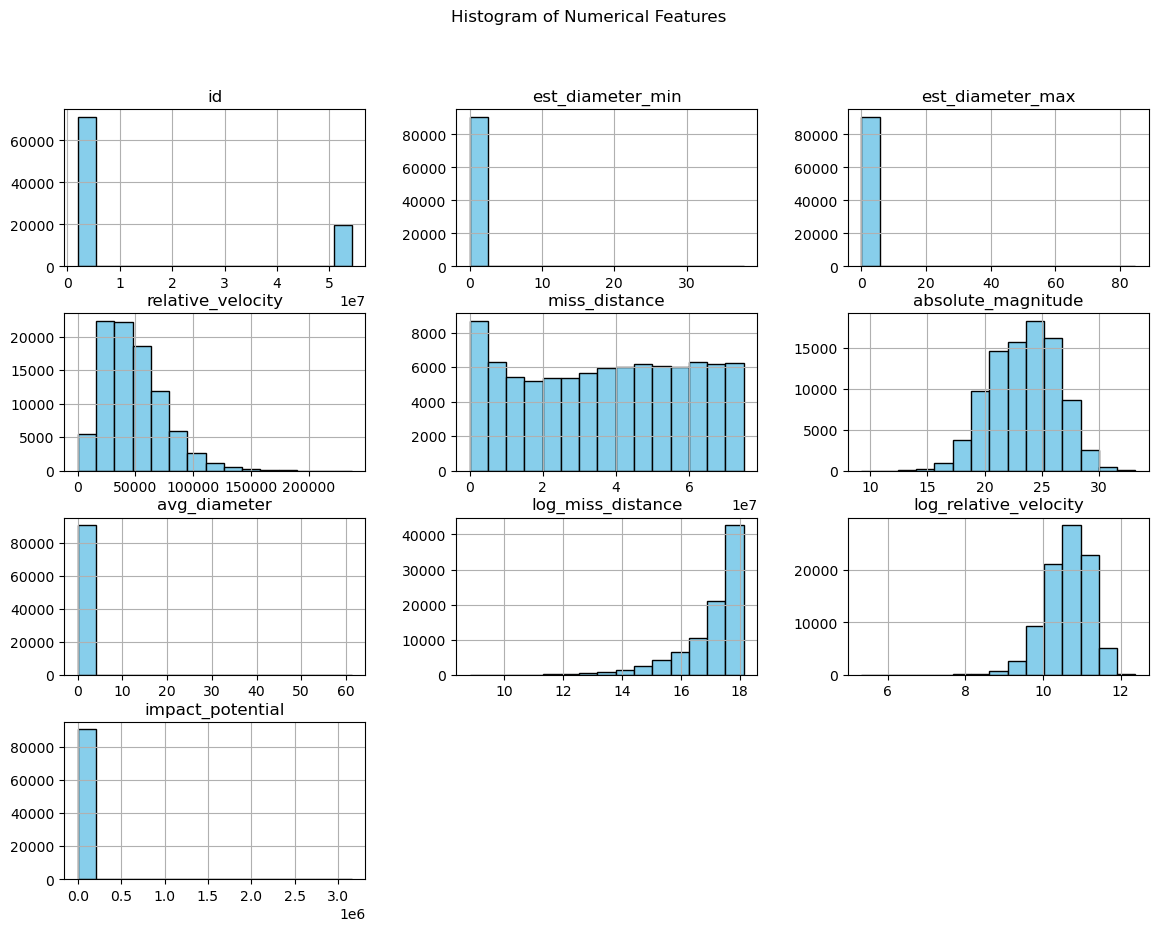

In [26]:
# Visualization
# Plot histogram for numerical features
numerical_features.hist(bins=15, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histogram of Numerical Features')
plt.show()

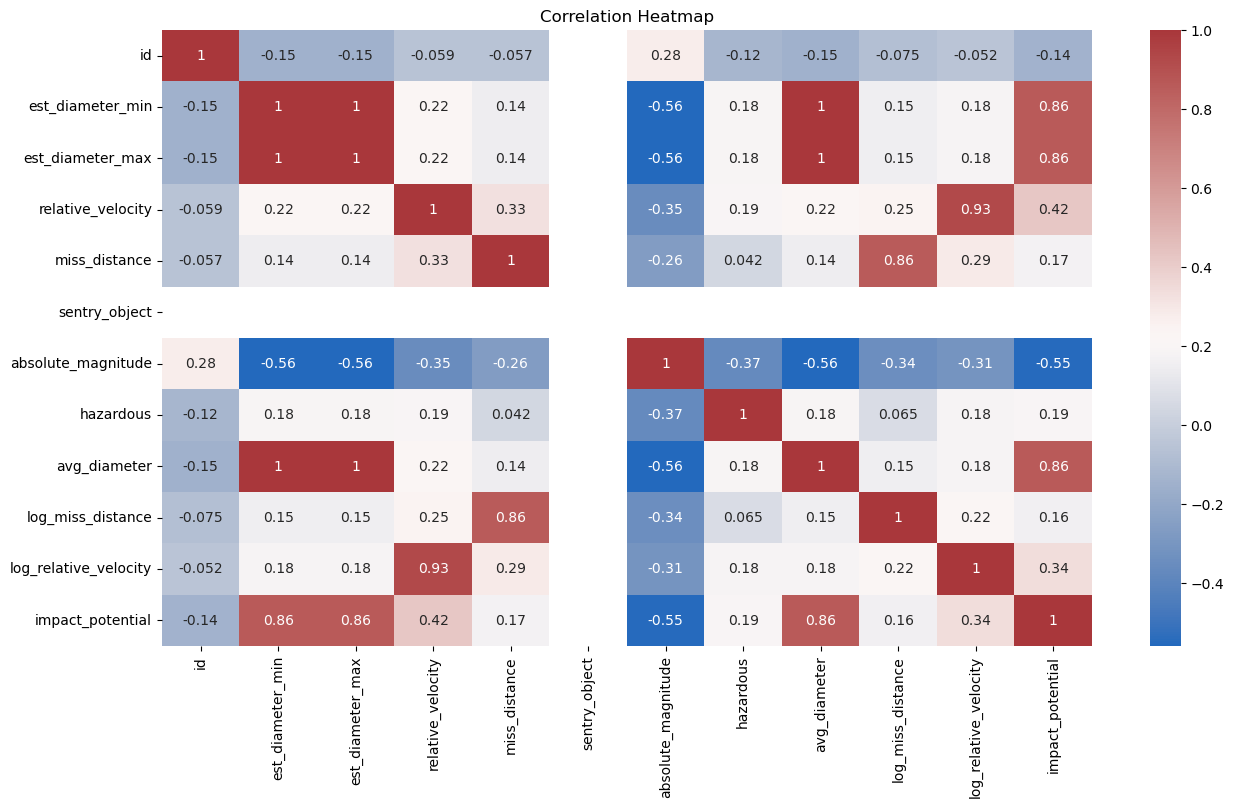

In [27]:
# Correlation heatmap
correlation = neo.corr(method='pearson', min_periods=1, numeric_only=True).round(4)
plt.figure(figsize=(15,8))
sns.heatmap(correlation, annot=True, cmap='vlag')
plt.title("Correlation Heatmap")
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


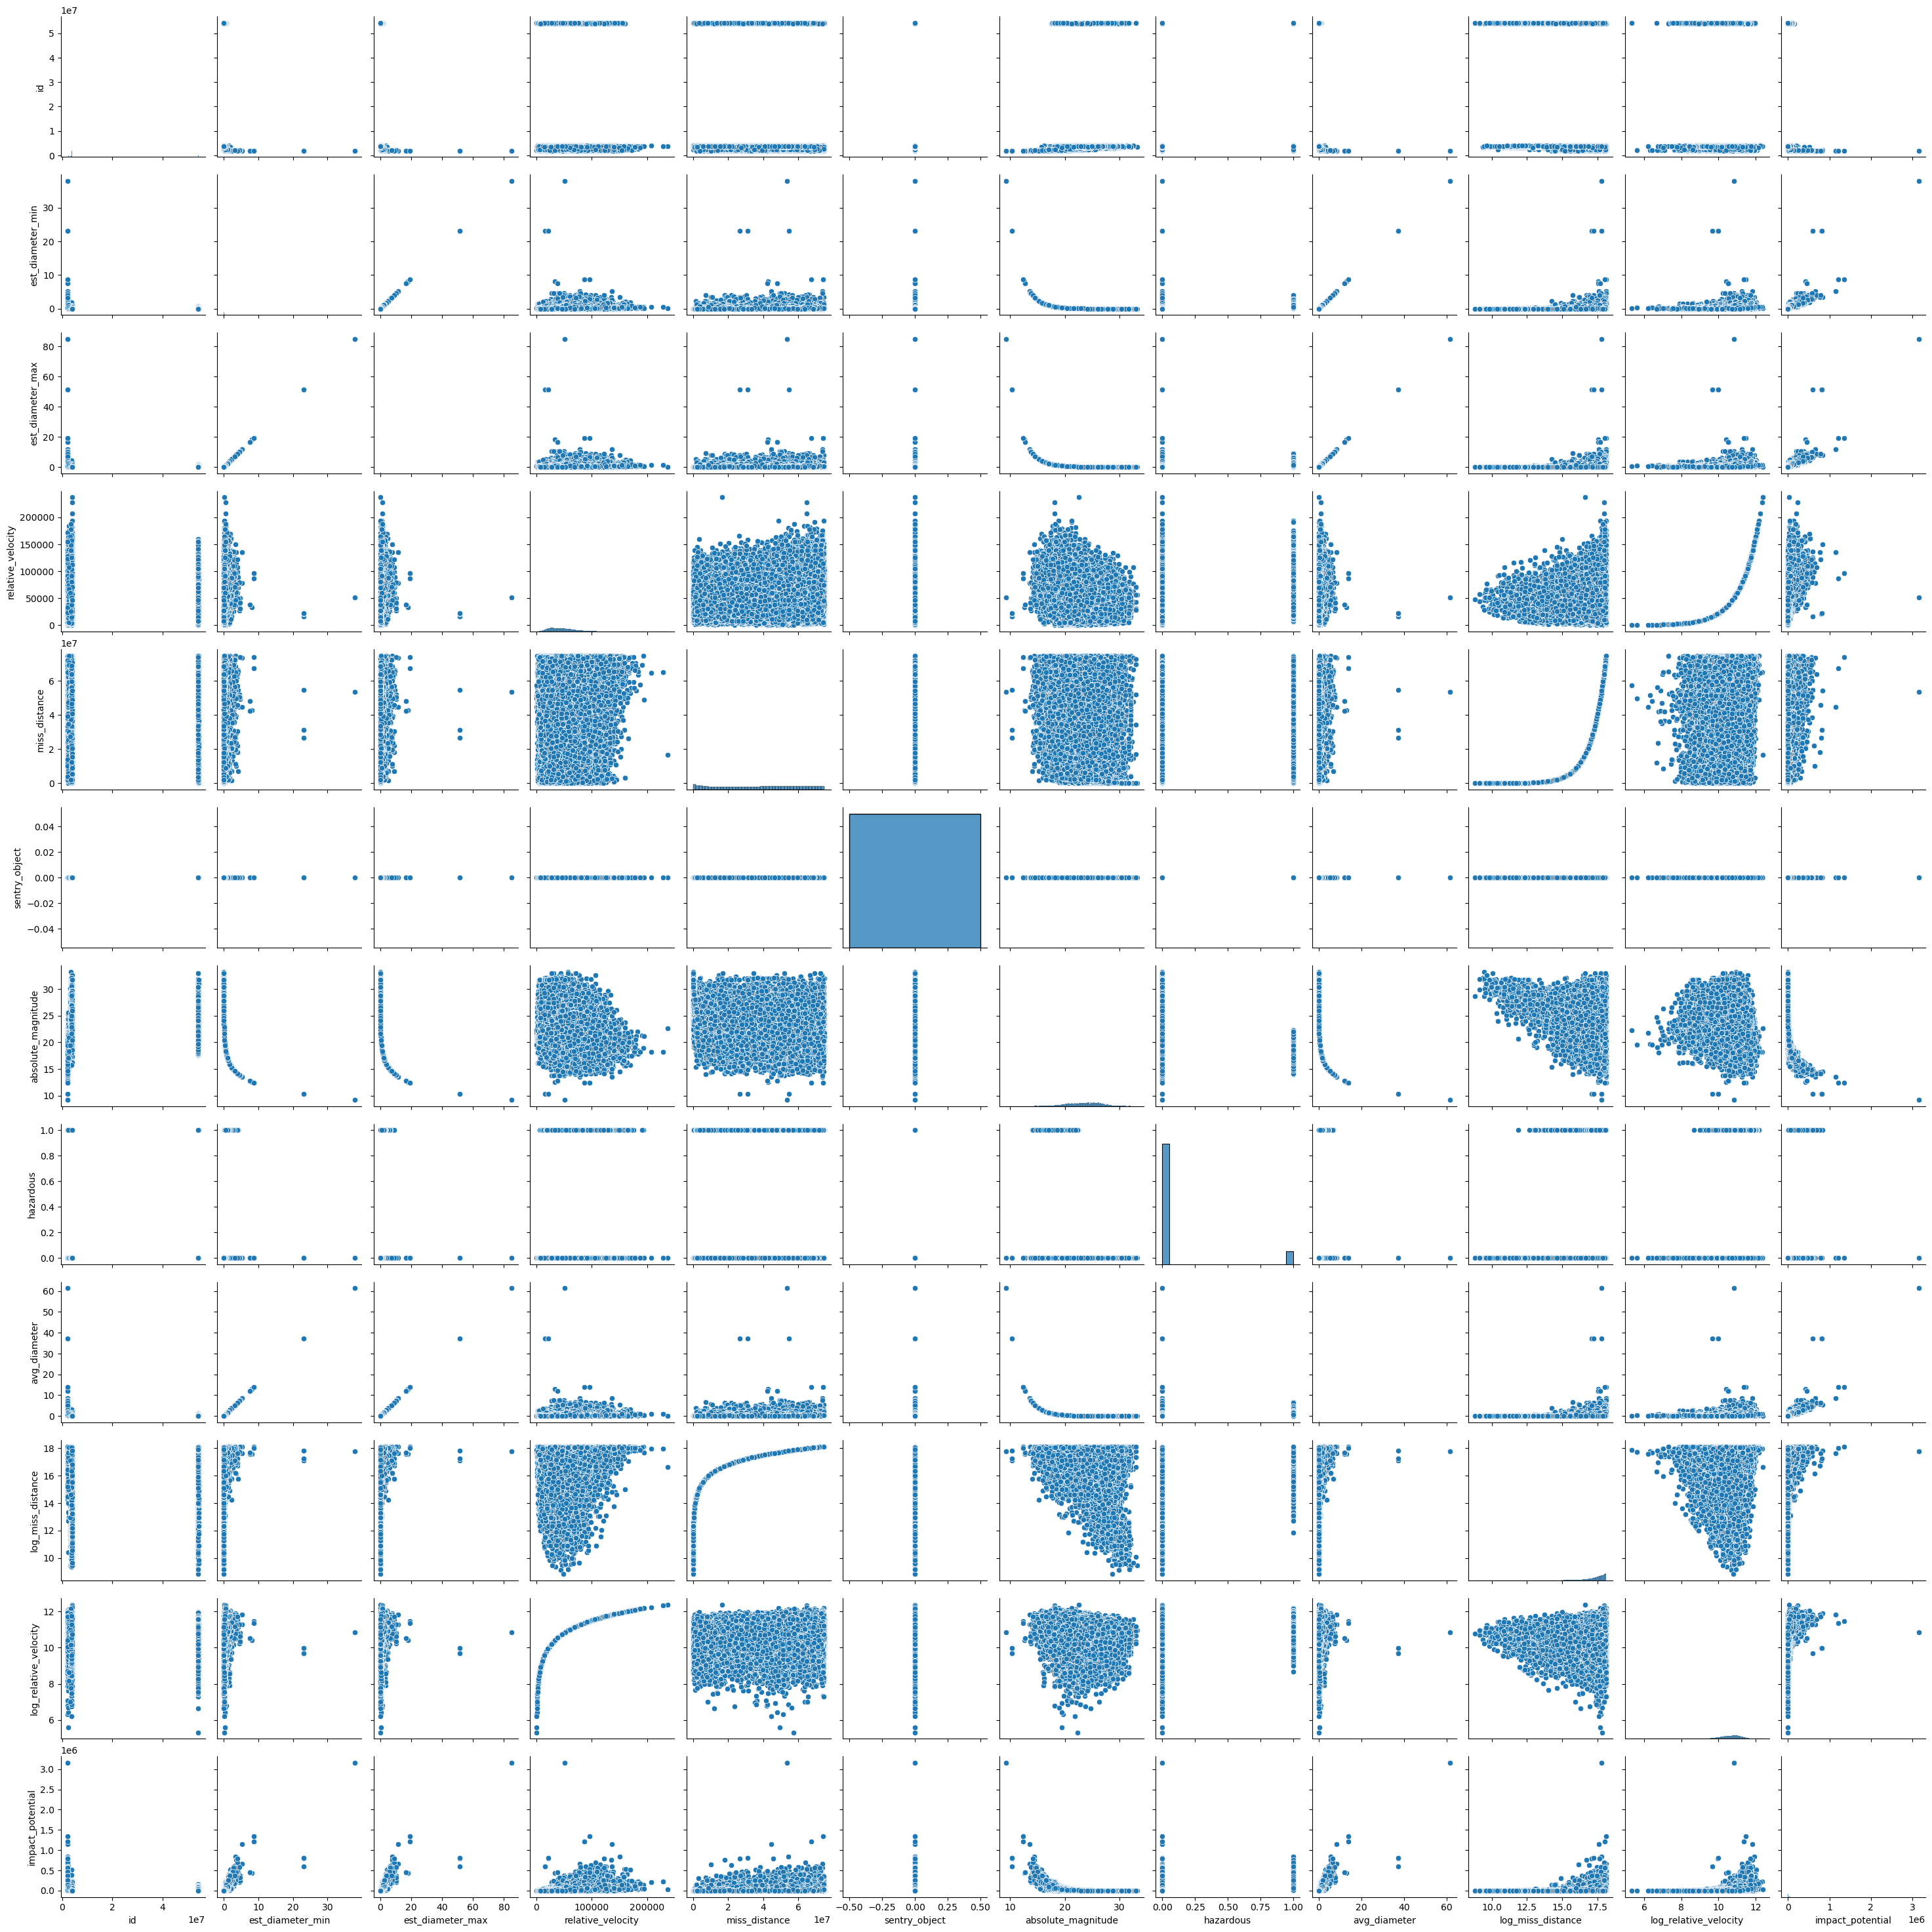

In [28]:
# Pairplot to visualize relationships between variables
sns.pairplot(neo)
plt.show()

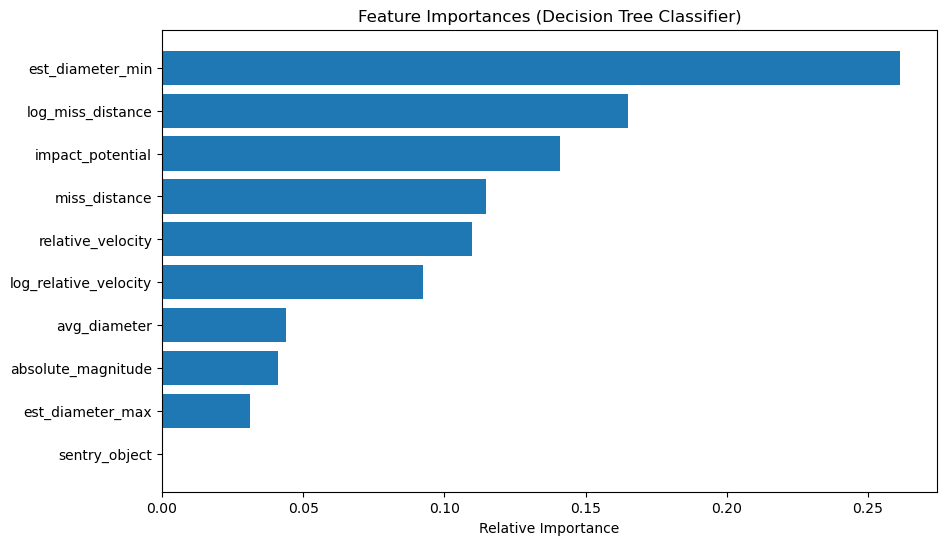

In [29]:
# Feature Importance - Decision Tree
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Decision Tree Classifier)')
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), X.columns[indices])
plt.xlabel('Relative Importance')
plt.show()

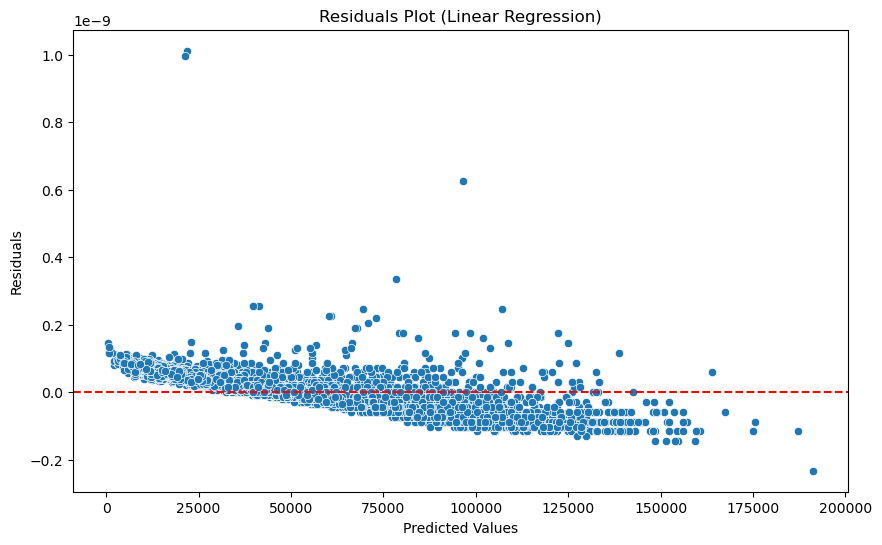

In [30]:
# Residual Plot for Regression Model
residuals = y_reg_test - y_reg_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_reg_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot (Linear Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [31]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report

# Additional Metrics for Regression
print("\nAdditional Metrics for Regression (Linear Regression):")

# Cross-validation for Regression
cv_scores = cross_val_score(regressor, X_train_reg_scaled, y_reg_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE for Regression Model: {cv_scores.mean()}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_reg_test, y_reg_pred)
print(f"Mean Absolute Error (MAE) for Regression Model: {mae}")

# Additional Metrics for Classification
print("\nAdditional Metrics for Classification (Decision Tree Classifier):")

# Cross-validation for Classification
cv_scores_class = cross_val_score(classifier, X_train_scaled, y_class_train, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy for Classification Model: {cv_scores_class.mean()}")

# Confusion Matrix
cm = confusion_matrix(y_class_test, y_class_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1-Score
print("Classification Report:")
print(classification_report(y_class_test, y_class_pred))

# Overall Comparison of Models
print("\nOverall Comparison of Models:")
print(f"Regression Model (Linear Regression): R-squared = {r2:.4f}, MAE = {mae:.4f}")
print(f"Classification Model (Decision Tree): Accuracy = {accuracy:.4f}")



Additional Metrics for Regression (Linear Regression):
Cross-validated MSE for Regression Model: -6.215541575016194e-22
Mean Absolute Error (MAE) for Regression Model: 3.2586146902797075e-11

Additional Metrics for Classification (Decision Tree Classifier):
Cross-validated Accuracy for Classification Model: 0.8901167555812275
Confusion Matrix:
 [[15418  1021]
 [  908   821]]
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.94      0.94     16439
        True       0.45      0.47      0.46      1729

    accuracy                           0.89     18168
   macro avg       0.70      0.71      0.70     18168
weighted avg       0.90      0.89      0.90     18168


Overall Comparison of Models:
Regression Model (Linear Regression): R-squared = 1.0000, MAE = 0.0000
Classification Model (Decision Tree): Accuracy = 0.8938


# Conclusion

In this project, we combined robust feature engineering with both regression and classification models to analyze Near-Earth Object (NEO) data, and the results provide several key insights:

## 1. Feature Engineering & Preprocessing

- **New Features:**  
  We enhanced our dataset by deriving features such as `avg_diameter`, `log_miss_distance`, `log_relative_velocity`, and an interaction term `impact_potential`. These transformations were aimed at capturing the underlying physics and reducing skewness in our data.

- **Scaling and Data Splitting:**  
  Proper scaling using `StandardScaler` and a thoughtful train-test split ensured that our models were trained on standardized features, making them more robust and reliable.

## 2. Regression Model (Linear Regression)

- **Performance Metrics:**
  - **Mean Squared Error (MSE):** 1.75e-21
  - **R-squared:** 1.0
  - **Mean Absolute Error (MAE):** ~3.26e-11

- **Interpretation:**  
  These exceptionally low error metrics suggest that our chosen features explain almost all the variance in the target variable (`relative_velocity`). While an R-squared of 1.0 may raise questions about potential overfitting or the inherent simplicity of the target’s relationship with the predictors, it also indicates that our feature engineering steps were highly effective for this task. Moving forward, it would be valuable to validate these findings on external data or through additional cross-validation techniques to ensure that the model’s performance is robust and generalizes well.

## 3. Classification Model (Decision Tree Classifier)

- **Performance Metrics:**
  - **Overall Accuracy:** ~89.38%

- **Confusion Matrix Insight:**  
  The confusion matrix reveals that while non-hazardous asteroids are correctly identified most of the time, the precision (0.45) and recall (0.47) for hazardous asteroids are lower.

- **Interpretation:**  
  This disparity indicates that while the model performs well overall, it struggles more with identifying hazardous objects—a challenge that is common in imbalanced classification tasks. The lower precision and recall for the hazardous class suggest that additional strategies (such as resampling techniques, ensemble methods, or cost-sensitive learning) could be employed to improve the detection of these critical cases.

## 4. Overall Insights

- The integration of detailed exploratory data analysis, thoughtful feature engineering, and rigorous model evaluation (using both cross-validation and multiple metrics) demonstrates a comprehensive approach to solving real-world predictive problems.
- The nearly perfect regression metrics underscore the importance of domain-informed feature creation, while the nuanced results from the classification model highlight the complexities of handling imbalanced data—a common challenge in many real-world applications.
- These results provide not only a deep understanding of the NEO dataset but also showcase my ability to implement end-to-end machine learning workflows that balance model performance with interpretability and reliability.

---

### Final Thoughts

This project illustrates my proficiency in:
- Transforming raw data into insightful features,
- Applying appropriate preprocessing steps to enhance model performance,
- Evaluating models with multiple metrics to capture their strengths and limitations,
- And identifying avenues for future improvements.

Such a comprehensive approach is essential for developing reliable predictive models, and it underscores my capability to tackle complex data-driven challenges—an asset that I am excited to bring to future roles.
